<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/HR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'

In [2]:
cd drive/Shareddrives/AIOT_LAB_DOCS/Data/

/content/drive/Shareddrives/AIOT_LAB_DOCS/Data


##  Read matfile

In [3]:
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat',
 'TrainSubj1',
 'TrainSubj2',
 'TrainSubj3',
 'TrainSubj4',
 'TrainSubj5',
 'TrainSubj6',
 'TrainSubj7',
 'TrainSubj8',
 'TrainSubj9',
 'TrainSubj10',
 'TrainSubj11',
 'TrainSubj12',
 'resultsS0.pickle',
 'resultsS1.pickle',
 'resultsS2.pickle',
 'my_first_model.png',
 'resultsS4.pickle',
 'resultsS5.pickle',
 'resultsS7.pickle',
 'result

## Read into dataframe of pandas

In [15]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder, HR = False):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    if HR == False:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    else:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and ('BPMtrace' in f.name)] 
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(pd.DataFrame(sio.loadmat(mat_file)['BPM0'])).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    
    return mat_files, dfs

In [8]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

### Check the read file

In [9]:
mat_files

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_12_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02.mat')]

## Read heart rate data

In [16]:
hr_file, hrdfs = read_folder(parent_path, HR=True)

In [24]:
hrdfs[8]

,0,Subject
0,86.5052,8
1,85.4214,8
2,83.1486,8
3,80.4529,8
4,77.2311,8
...,...,...
144,142.1053,8
145,140.5733,8
146,139.6070,8
147,138.5870,8


148


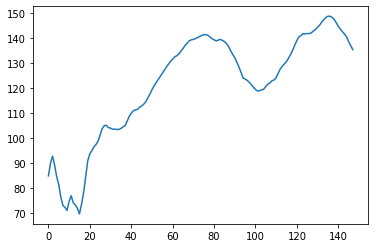

In [33]:
import matplotlib.pyplot as plt
plt.plot(hrdfs[0][0])
print(len(hrdfs[0][0]))

## Compute heart rate 

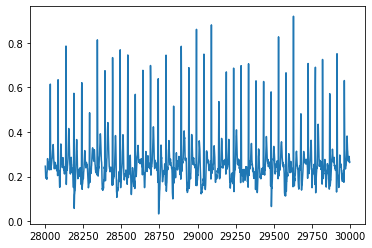

In [164]:
ECG0 = dfs[1][0]
plt.plot(ECG0[28000:30000])

In [165]:
# Check the length of data
len(ECG0)
dis = 1000 # 8 seconds
step = 250 # 2 seconds
#ECGseg = []
N = len(ECG0)
ECGseg = [ECG0[(i*step):(i*step + dis)] for i in range(0,int(N/step) - 3)]


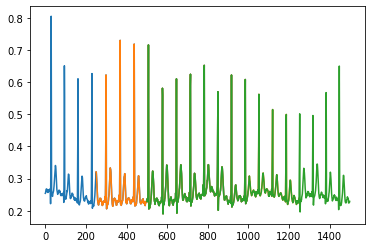

In [166]:
plt.plot(ECGseg[0])
plt.plot(ECGseg[1])
plt.plot(ECGseg[2])


127.5


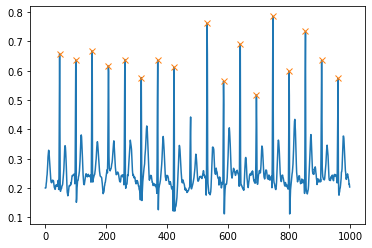

In [178]:
from scipy.signal import find_peaks
x = ECGseg[102].values
peaks, _ = find_peaks(x, prominence=0.3)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")

Nbeat = len(peaks)

BPM = Nbeat*7.5
print(BPM)

In [176]:
import numpy as np

a = np.diff(peaks)
a

array([53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 55, 53, 54, 53, 19, 35, 53,
       54])

{'boxes': [<matplotlib.lines.Line2D at 0x7fba6f2669d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fba6f1bead0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fba713af490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fba6f1b0f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fba6f2668d0>,
  <matplotlib.lines.Line2D at 0x7fba6f1be990>]}

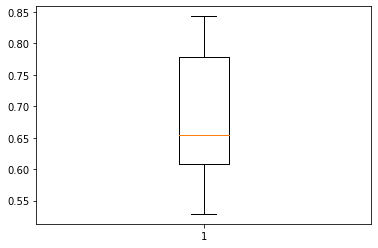

In [169]:
plt.boxplot(x[peaks])

In [ ]:
ECG0[]

### Adaptive detect peaks
* default prominence w=0.2
* if the distance between outline will adapt the weight
** Increasing weight if many peaks detects
** Decreasing weight if less peaks detects

In [172]:
BPM = []
weight = 0.2
i = 0
for ecg in ECGseg:
  peaks, _ = find_peaks(ecg, prominence=weight)
  a = np.diff(peaks)
  while not (2*min(a) > np.median(a) and np.median(a)*2 > max(a)):
    if 2*min(a) <np.median(a): 
      weight = weight + 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
    if np.median(a)*2 < max(a): 
      weight = weight - 0.05
      peaks, _ = find_peaks(ecg, prominence=weight)
    print(weight)
    a = np.diff(peaks)
  bpm = len(peaks)*7.5
  BPM.append(bpm)
  print(i)
  i = i + 1
plt.plot(BPM)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
0.25
38
39
40
41
42
0.2
43
44
45
46
47
48
0.25
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
0.3
70
71
72
73
74
75
76
77
78
79
80
81
0.25
82
83
84
85
86
87
88
89
90
91
92
93
94
0.2
95
96
97
98
99
0.25
100
101
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.

KeyboardInterrupt: ignored

In [152]:
np.diff(peaks)


array([87, 87, 87, 86, 85, 86, 85, 85, 86, 86, 85, 26])

In [153]:
weight

0.7